Коцевич Андрей, Б02-920

**D7**

Требуется решить двуммерное уравнение конвекции-диффузии: $u_t=λ_1u_x+λ_2u_y=κ(u_{xx}+u_{yy})+f$ с использованием разностной схемы типа "крест" и равномерной расчётной сетки $Δx=Δy=h$. В случае стационарных граничных условий $u|_Γ=𝛗(x,y)$ решение данного уравнения будет стремиться к решению уравнения $λ_1u_x+λ_2u_y=κ(u_{xx}+u_{yy})+f$ с теми же граничными условиями $u|_Γ=𝛗(x,y)$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [7]:
def solve(f, h, dt, u0, l1, l2, k, steps, bc=(lambda mat: mat)):
    if type(u0) == int:
        u0 = np.zeros(f.shape)
    u = np.copy(u0)
    
    fij = f[1:-1,1:-1]
    sol = []
    sol.append(np.copy(u))

    for i in range(steps):
        uipj = u[1:-1,2:]
        uimj = u[1:-1,:-2]
        uijp = u[2:,1:-1]
        uijm = u[:-2,1:-1]
        uij= u[1:-1,1:-1]
        u_kp = uij + dt/2*( fij - l1 * (uipj - uimj) / (2*h) - l2 * (uijp - uijm) / (2*h) -l1*l1*dt/2 * (uipj - 2*uij + uimj) / (h*h) - l2*l2*dt/2 * (uijp - 2*uij + uijm) / (h*h) )
        u[1:-1,1:-1] = u_kp
        u = bc(u)
        p = k*dt/4/(h*h)
        uijp = u[2:,1:-1]
        uijm = u[:-2,1:-1]
        uij= u[1:-1,1:-1]
        D = uij + p*(uijp - 2*uij + uijm)
        ui = []
        ab = np.ones((3, uij.shape[0])) * np.array([[-p],[1+2*p],[-p]])
        for d in D:
            ui.append(linalg.solve_banded((1,1), ab, d))
        u[1:-1,1:-1] = np.array(ui)
        u = bc(u)
        uipj = u[1:-1,2:]
        uimj = u[1:-1,:-2]
        uij= u[1:-1,1:-1]
        D = uij + p*(uipj - 2*uij + uimj)
        uj = []
        ab = np.ones((3, uij.shape[0])) * np.array([[-p],[1+2*p],[-p]])
        for d in D:
            uj.append(linalg.solve_banded((1,1), ab, d))
        u[1:-1,1:-1] = np.array(uj).T
        u = bc(u)
        sol.append(np.copy(u))
    
    return np.array(sol)

In [8]:
x_min = -1.
x_max = 1.
h = 0.02
nx = int((x_max - x_min) / h)
y_min = -1.
y_max = 1.
ny = int((y_max - y_min) / h)

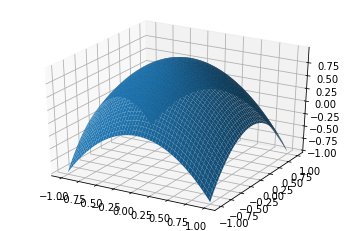

In [9]:
x = np.linspace(x_min, x_max, nx)
y = np.linspace(y_min, y_max, ny)
xg, yg = np.meshgrid(x,y)
f=1 - (xg**2 + yg**2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xg, yg, f)
plt.show()

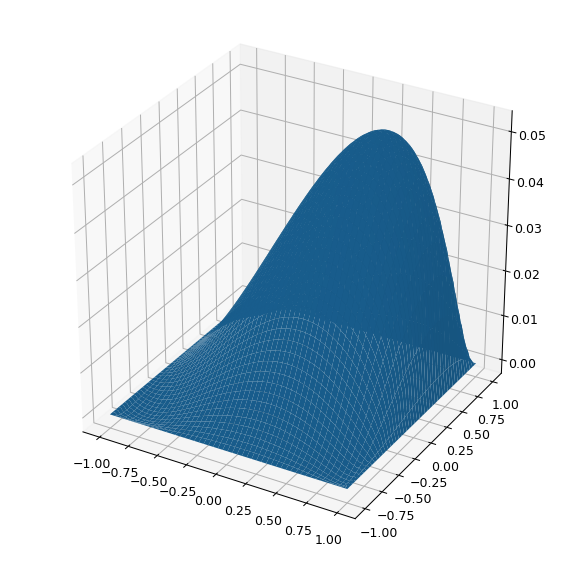

In [10]:
sol = solve(f, h, 0.001, 0, l1=15, l2=10, k=2, steps=1000)
fig = plt.figure(figsize=(8,8), dpi=90)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xg, yg, sol[1000,:,:])
plt.show()